Nama : Marthalia Kusumarima

NPM : 23083010100

Mata Kuliah : Statistika regresi (Korelasi Dummy)

In [83]:
# Memanggil Database
import pandas as pd
df = pd.read_excel('/content/data harga jual mobil.xlsx')
df.head()

,Negara ke-,Ukuran Mesin,Design Mobil,Harga Jual Mobil
0,1,130,1,13495
1,2,130,1,16500
2,3,152,1,16500
3,4,109,1,13950
4,5,136,1,17450


In [84]:
# Mengganti nama variabel
df.rename(columns={'Ukuran Mesin': 'X1', 'Design Mobil': 'X2', 'Harga Jual Mobil': 'Y'}, inplace=True)
df.head()

,Negara ke-,X1,X2,Y
0,1,130,1,13495
1,2,130,1,16500
2,3,152,1,16500
3,4,109,1,13950
4,5,136,1,17450


In [85]:
df.tail()

,Negara ke-,X1,X2,Y
35,36,92,0,7295
36,37,110,0,7895
37,38,110,0,9095
38,39,110,0,8845
39,40,110,1,10295


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Negara ke-  40 non-null     int64
 1   X1          40 non-null     int64
 2   X2          40 non-null     int64
 3   Y           40 non-null     int64
dtypes: int64(4)
memory usage: 1.4 KB


# **Menghitung nilai korelasi pearson**

In [87]:
# Hitung nilai korelasi pearson antara ukuran mesin dan harga jual
from scipy.stats import pearsonr

list1= df['X1']
list2= df['Y']
corr, _ = pearsonr(list1, list2)
print('Nilai korelasi pearson antara ukuran mesin dan harga jual: %.5f' % corr)

Nilai korelasi pearson antara ukuran mesin dan harga jual: 0.92747


In [88]:
# Hitung nilai korelasi pearson antara design mobil dan harga jual
from scipy.stats import pearsonr

list1= df['X2']
list2= df['Y']
corr, _ = pearsonr(list1, list2)
print('Nilai korelasi pearson antara design mobil dan harga jual: %.5f' % corr)

Nilai korelasi pearson antara design mobil dan harga jual: 0.77206


In [89]:
# Hitung nilai korelasi pearson antara ukuran mesin dan design mobil
from scipy.stats import pearsonr

list1= df['X1']
list2= df['X2']
corr, _ = pearsonr(list1, list2)
print('Nilai korelasi pearson antara ukuran mesin dan design mobil: %.5f' % corr)

Nilai korelasi pearson antara ukuran mesin dan design mobil: 0.69676


Berdasarkan nilai Korelasi Pearson antara Ukuran Mesin dan Desain Mobil  sebesar 0.69676, serta antara Desain Mobil dan Harga Jual Mobil 0.77206 dapat disimpulkan bahwa terdapat hubungan korelasi positif yang cukup kuat, karena nilai koefisien korelasi mendekati 1. Sementara itu, korelasi antara Ukuran Mesin dan Harga Jual Mobil menunjukkan nilai sebesar 0.92748, yang menunjukkan hubungan korelasi positif yang sangat kuat, karena nilai koefisien korelasi tersebut sangat mendekati 1.

# Menghitung korelasi biserial

In [90]:
# Hitung Korelasi Biserial Poin Desain Mobil VS Harga Jual Mobil
import scipy.stats as stats

correlation, pvalue = stats.pointbiserialr(df['X2'], df['Y'])
print(f'PointbiserialrResult(correlation={correlation:.5f}, pvalue={pvalue:})')

PointbiserialrResult(correlation=0.77206, pvalue=5.422379333800295e-09)


Berdasarkan Korelasi Biserial Poin sebesar 0.77206 maka disimpulkan bahwa variabel Desain Mobil dengan variabel Harga Jual Mobil memiliki hubungan Korelasi yang kuat antara 2 variabel. Yang artinya perubahan dalam desain mobil memiliki pengaruh yang cukup besar terhadap harga jual mobil.

# **Membentuk model regresi dummy**

In [91]:
# Memodelkan dengan regresi linear berganda

import numpy as np
import statsmodels.api as sm # Import statsmodels.api instead of statsmodels.formula.api
import pandas as pd

df_with_dummies = pd.get_dummies(data=df, columns=['X2'])
x = df_with_dummies[['X1', 'X2_0', 'X2_1']]
y = df_with_dummies['Y']
reg_mod = 'Y ~ X1 + X2_1'

model = sm.OLS.from_formula(formula=reg_mod, data=df_with_dummies).fit()
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     151.2
Date:                Mon, 11 Nov 2024   Prob (F-statistic):           1.57e-18
Time:                        09:34:24   Log-Likelihood:                -374.87
No. Observations:                  40   AIC:                             755.7
Df Residuals:                      37   BIC:                             760.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -1.027e+04   1870.696     -5.489   

In [92]:
prediksi = model.predict(x)
print(prediksi.head())

0    17667.541001
1    17667.541001
2    21678.649850
3    13838.755282
4    18761.479778
dtype: float64


In [93]:
residual = model.resid
print(residual.head())

0   -4172.541001
1   -1167.541001
2   -5178.649850
3     111.244718
4   -1311.479778
dtype: float64


Soal Halaman 135 : Suatu showroom mobil ingin mengetahui apakah ukuran mesin dan desain mesin berpengaruh terhadap harga jual mobil. adapun design mobil merupakan jenis data kualitatif yang terdiri dari standar dan turbo. dimisalkan standar = 0 dan turbo = 1. Selain itu showroom tersebut ingin memprediksi berap aharga jual mobil jika design mobilnya standar dengan ukuran mesin 94

In [94]:
designmobil = 0
ukuranmesin = 94
koefisien = model.params
intercept = model.params['Intercept']
koefisienX1 = model.params['X1']
koefisienX2 = model.params['X2_1[T.True]']

print('Intercept :', intercept)
print('Koefisien X1 (Ukuran Mesin):', koefisienX1)
print('Koefisien X2 (Design Mobil):', koefisienX2)

# Calculate the prediction once
prediksi = intercept + koefisienX1 * ukuranmesin + koefisienX2 * designmobil
print('Prediksi Harga Mobil:', prediksi)

Intercept : -10268.316967728531
Koefisien X1 (Ukuran Mesin): 182.32312948731231
Koefisien X2 (Design Mobil): 4233.851135728866
Prediksi Harga Mobil: 6870.0572040788265


# **Melakukan Uji F**

In [95]:
import numpy as np

Ukuran_Mesin = df['X1']
Desain_Mobil = df['X2']
Harga_Jual_Mobil = df['Y']

k = 2
alpha = 0.05

# Correcting the key to 'const' to access the intercept term
intercept = model.params['Intercept']
coef_Ukuran_Mesin = model.params['X1']
coef_Desain_Mobil = model.params['X2_1[T.True]']

# Menghitung rata-rata
mean_Ukuran_Mesin = np.mean(Ukuran_Mesin)
mean_Desain_Mobil = np.mean(Desain_Mobil)
mean_Harga_Jual_Mobil = np.mean(Harga_Jual_Mobil)

#Membuat prediksi nilai y(y_topi)
y_topi = intercept + coef_Ukuran_Mesin * df['X1'] + coef_Desain_Mobil * df['X2']

# Menghitung SST (Total Sum of Squares)
SST = np.sum((y - mean_y) ** 2)
SSE = np.sum((y - y_topi) ** 2)
R_squared = 1 - (SSE / SST)
R_squared_adj = 1 - (1-R_squared)*(len(y)-1)/(len(y)-k-1)

print(f'Nilai dari SST: {SST:.5f}')
print(f'Nilai dari SSE: {SSE:.5f}')
print(f'Nilai dari Ytopi: {SST:.5f}')
print(f'Nilai dari SSE: {SSE:.5f}')
print(" ")
print(f'Nilai dari R-squared: {R_squared:.5f}')
print(f'Nilai dari R-squared Adjusted: {R_squared_adj:.5f}')

Nilai dari SST: 2966988515.97500
Nilai dari SSE: 323498002.54797
Nilai dari Ytopi: 2966988515.97500
Nilai dari SSE: 323498002.54797
 
Nilai dari R-squared: 0.89097
Nilai dari R-squared Adjusted: 0.88507


Berdasarkan hasil UJI F, diperoleh nilai F-hitung sebesar 151.174, yang jauh lebih besar dibandingkan dengan nilai F-tabel sebesar 3.252 pada tingkat signifikansi 0.05. Dengan demikian, terdapat bukti yang cukup untuk menolak hipotesis null yang menyatakan bahwa tidak ada variabel independen yang berpengaruh signifikan terhadap variabel dependen. Oleh karena itu, dapat disimpulkan bahwa minimal ada satu variabel independen yang memiliki pengaruh signifikan terhadap variabel dependen dalam model ini. Hasil ini menunjukkan bahwa variabel-variabel independen yang digunakan berkontribusi secara signifikan terhadap variabel dependen.

#**R Squared**

In [96]:
import numpy as np

Ukuran_Mesin = df['X1']
Desain_Mobil = df['X2']
Harga_Jual_Mobil = df['Y']

k = 2
alpha = 0.05

intercept = model.params['Intercept']
coef_Ukuran_Mesin = model.params['X1']
coef_Desain_Mobil = model.params['X2_1[T.True]']

# Menghitung rata-rata
mean_Ukuran_Mesin = np.mean(Ukuran_Mesin)
mean_Desain_Mobil = np.mean(Desain_Mobil)
mean_Harga_Jual_Mobil = np.mean(Harga_Jual_Mobil)

#Membuat prediksi nilai y(y_topi)
y_topi = intercept + coef_Ukuran_Mesin * df['X1'] + coef_Desain_Mobil * df['X2']

# Menghitung SST (Total Sum of Squares)
SST = np.sum((y - mean_y) ** 2)
SSE = np.sum((y - y_topi) ** 2)
R_squared = 1 - (SSE / SST)
R_squared_adj = 1 - (1-R_squared)*(len(y)-1)/(len(y)-k-1)

print(f'Nilai dari SST: {SST:.5f}')
print(f'Nilai dari SSE: {SSE:.5f}')
print(f'Nilai dari Ytopi: {SST:.5f}')
print(f'Nilai dari SSE: {SSE:.5f}')
print(" ")
print(f'Nilai dari R-squared: {R_squared:.5f}')
print(f'Nilai dari R-squared Adjusted: {R_squared_adj:.5f}')


Nilai dari SST: 2966988515.97500
Nilai dari SSE: 323498002.54797
Nilai dari Ytopi: 2966988515.97500
Nilai dari SSE: 323498002.54797
 
Nilai dari R-squared: 0.89097
Nilai dari R-squared Adjusted: 0.88507


In [97]:
import numpy as np

Ukuran_Mesin = df['X1']
Desain_Mobil = df['X2']
Harga_Jual_Mobil = df['Y']

k = 2
alpha = 0.05

# The intercept term is likely named 'Intercept' instead of 'const'
intercept = model.params['Intercept']
coef_Ukuran_Mesin = model.params['X1']
coef_Desain_Mobil = model.params['X2_1[T.True]']

# Menghitung rata-rata
mean_Ukuran_Mesin = np.mean(Ukuran_Mesin)
mean_Desain_Mobil = np.mean(Desain_Mobil)
mean_Harga_Jual_Mobil = np.mean(Harga_Jual_Mobil)

#Membuat prediksi nilai y(y_topi)
y_topi = intercept + coef_Ukuran_Mesin * df['X1'] + coef_Desain_Mobil * df['X2']

# Menghitung SST (Total Sum of Squares)
# Replace y with Harga_Jual_Mobil for consistency
SST = np.sum((Harga_Jual_Mobil - mean_Harga_Jual_Mobil) ** 2)
SSE = np.sum((Harga_Jual_Mobil - y_topi) ** 2)
R_squared = 1 - (SSE / SST)
R_squared_adj = 1 - (1-R_squared)*(len(Harga_Jual_Mobil)-1)/(len(Harga_Jual_Mobil)-k-1)

print(f'Nilai dari SST: {SST:.5f}')
print(f'Nilai dari SSE: {SSE:.5f}')
print(f'Nilai dari Ytopi: {SST:.5f}') # This line seems to be intended to print y_topi but is printing SST
print(f'Nilai dari SSE: {SSE:.5f}')
print(" ")
print(f'Nilai dari R-squared: {R_squared:.5f}')
print(f'Nilai dari R-squared Adjusted: {R_squared_adj:.5f}')

Nilai dari SST: 2966988515.97500
Nilai dari SSE: 323498002.54797
Nilai dari Ytopi: 2966988515.97500
Nilai dari SSE: 323498002.54797
 
Nilai dari R-squared: 0.89097
Nilai dari R-squared Adjusted: 0.88507


Nilai yang didapatkan yaitu R Squared dan R Squared adjusted yang tinggi menunjukkan bahwa model ini sangat baik dalam menjelaskan variasi dalam harga jual mobil berdasarkan ukuran mesin dan design mobil.

#**Melakukan Uji T**

In [98]:
import numpy as np
from scipy import stats
import pandas as pd
import statsmodels.api as sm

# Menentukan hipotesis null dan hipotesis alternatif
print("Menentukan hipotesis null dan hipotesis alternatif")
print("H0: B1 = B2 = variabel Desain Mobil berpengaruh signifikan terhadap Harga Jual Mobil.")
print("H1: variabel Desain Mobil tidak berpengaruh signifikan terhadap Harga Jual Mobil.")
print(" ")

# Memisahkan variabel independen dan dependen dari data
Ukuran_Mesin = df['X1']
Desain_Mobil = df['X2']
Harga_Jual_Mobil = df['Y']

# Menambahkan konstanta ke model regresi linier
X = sm.add_constant(df[['X1', 'X2']])
y = Harga_Jual_Mobil
k = 2  # Jumlah variabel independen
n = len(Ukuran_Mesin)  # Jumlah sampel

# Menentukan tingkat signifikan
alpha = 0.05
print("Nilai tingkat signifikan:", alpha)

# Melakukan regresi linier berganda
model = sm.OLS(y, X).fit()

# Menyimpan parameter model
intercept = model.params['const']
coef_Ukuran_Mesin = model.params['X1']
coef_Desain_Mobil = model.params['X2']

# Menyimpan koefisien regresi dan standar errornya
b1 = coef_Ukuran_Mesin
b2 = coef_Desain_Mobil
SE_b1 = model.bse['X1']  # Standar error untuk variabel Ukuran Mesin
SE_b2 = model.bse['X2']  # Standar error untuk variabel Desain Mobil

# Menghitung nilai T-hitung untuk masing-masing koefisien
t_hit_b1 = b1 / SE_b1
t_hit_b2 = b2 / SE_b2

# Menentukan nilai T-tabel berdasarkan tingkat signifikansi dan derajat kebebasan
T_tabel = stats.t.ppf(1 - alpha/2, n - k - 1)

# Menampilkan hasil analisis
print("\nHasil Analisis T-Test untuk Masing-Masing Koefisien:")
print(f"Nilai Koefisien regresi untuk Ukuran Mesin (B1): {b1}")
print(f"Nilai Koefisien regresi untuk Desain Mobil (B2): {b2}")
print(f"Standar Error B1: {SE_b1}")
print(f"Standar Error B2: {SE_b2}")
print(f"Nilai T-hitung untuk Ukuran Mesin (B1): {t_hit_b1:.5f}")
print(f"Nilai T-hitung untuk Desain Mobil (B2): {t_hit_b2:.5f}")
print(f"Nilai T-tabel: {T_tabel:.5f}\n")

# Interpretasi hasil uji T untuk Ukuran Mesin
print("Pengaruh Variabel Ukuran Mesin terhadap Harga Jual Mobil:")
if abs(t_hit_b1) > T_tabel:
    print(f"Dengan tingkat signifikansi {alpha}, nilai T-hitung untuk Ukuran Mesin sebesar {t_hit_b1:.5f} lebih besar dari T-tabel sebesar {T_tabel:.5f}.")
    print("Kesimpulannya, H0 ditolak, menunjukkan bahwa variabel Ukuran Mesin memiliki pengaruh yang signifikan terhadap Harga Jual Mobil.")
else:
    print(f"Dengan tingkat signifikansi {alpha}, nilai T-hitung untuk Ukuran Mesin sebesar {t_hit_b1:.5f} lebih kecil dari T-tabel sebesar {T_tabel:.5f}.")
    print("Oleh karena itu, H0 gagal ditolak, menunjukkan bahwa variabel Ukuran Mesin tidak memiliki pengaruh signifikan terhadap Harga Jual Mobil.")

# Interpretasi hasil uji T untuk Desain Mobil
print("\nPengaruh Variabel Desain Mobil terhadap Harga Jual Mobil:")
if abs(t_hit_b2) > T_tabel:
    print(f"Dengan tingkat signifikansi {alpha}, nilai T-hitung untuk Desain Mobil sebesar {t_hit_b2:.5f} lebih besar dari T-tabel sebesar {T_tabel:.5f}.")
    print("Kesimpulannya, H0 ditolak yang berarti variabel Desain Mobil berpengaruh signifikan terhadap Harga Jual Mobil.")
else:
    print(f"Dengan tingkat signifikansi {alpha}, nilai T-hitung untuk Desain Mobil sebesar {t_hit_b2:.5f} lebih kecil dari T-tabel sebesar {T_tabel:.5f}.")
    print("Oleh karena itu, H0 gagal ditolak yang berarti variabel Desain Mobil tidak berpengaruh signifikan terhadap Harga Jual Mobil.")


Menentukan hipotesis null dan hipotesis alternatif
H0: B1 = B2 = variabel Desain Mobil berpengaruh signifikan terhadap Harga Jual Mobil.
H1: variabel Desain Mobil tidak berpengaruh signifikan terhadap Harga Jual Mobil.
 
Nilai tingkat signifikan: 0.05

Hasil Analisis T-Test untuk Masing-Masing Koefisien:
Nilai Koefisien regresi untuk Ukuran Mesin (B1): 182.3231294873125
Nilai Koefisien regresi untuk Desain Mobil (B2): 4233.851135728893
Standar Error B1: 18.225783430900798
Standar Error B2: 1310.1346787581856
Nilai T-hitung untuk Ukuran Mesin (B1): 10.00358
Nilai T-hitung untuk Desain Mobil (B2): 3.23162
Nilai T-tabel: 2.02619

Pengaruh Variabel Ukuran Mesin terhadap Harga Jual Mobil:
Dengan tingkat signifikansi 0.05, nilai T-hitung untuk Ukuran Mesin sebesar 10.00358 lebih besar dari T-tabel sebesar 2.02619.
Kesimpulannya, H0 ditolak, menunjukkan bahwa variabel Ukuran Mesin memiliki pengaruh yang signifikan terhadap Harga Jual Mobil.

Pengaruh Variabel Desain Mobil terhadap Harga Jual 

Berdasarkan hasil uji T, hipotesis yang diuji menyatakan bahwa variabel Ukuran Mesin (B1) dan Desain Mobil (B2) berpengaruh terhadap Harga Jual Mobil. Dari hasil uji T, diperoleh nilai T-hitung untuk Ukuran Mesin sebesar 10.00358, yang lebih besar dari nilai T-tabel sebesar 2.02619 pada tingkat signifikansi 0.05. Hal ini menunjukkan bahwa Ukuran Mesin memiliki pengaruh yang signifikan terhadap Harga Jual Mobil, sehingga hipotesis nol (H0) ditolak. Begitu pula, untuk variabel Desain Mobil, nilai T-hitung sebesar 3.23162 juga lebih besar dari T-tabel, yang berarti variabel ini juga berpengaruh signifikan terhadap Harga Jual Mobil. Dengan demikian, dapat disimpulkan bahwa baik Ukuran Mesin maupun Desain Mobil berkontribusi secara signifikan dalam menentukan Harga Jual Mobil.

# **Uji Asumsi Regresi**

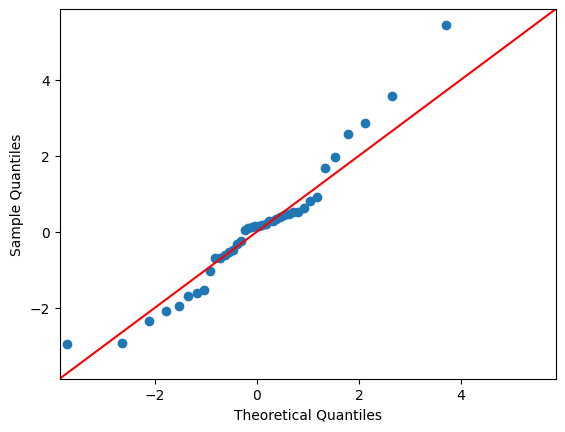

In [99]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
fig = sm.qqplot(residual, stats.t, fit=True, line='45')
plt.show()

# **Memeriksa Asumsi Residual Tidak Terjadi Autokorelasi**

(-0.9500000000000002, 41.95)

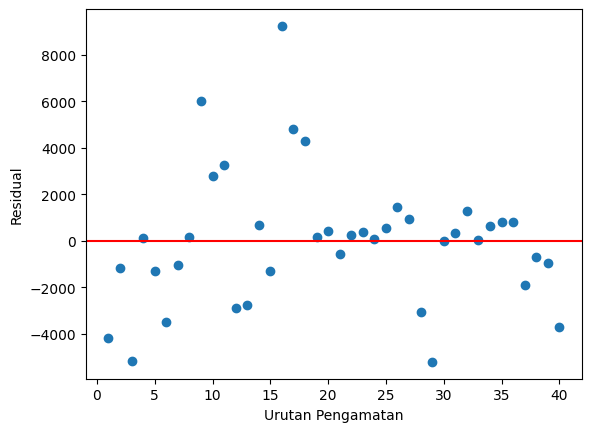

In [100]:
import matplotlib.pyplot as plt

# Ensure urutan_pengamatan has the same length as residual
urutan_pengamatan = pd.Series(range(1, len(residual) + 1)) # Generate a sequence from 1 to the length of 'residual'

plt.scatter(urutan_pengamatan, residual);
plt.axhline(0, color='r')
plt.xlabel('Urutan Pengamatan');
plt.ylabel('Residual');
plt.xlim()

# **Memeriksa asumsi residual tidak terjadi heterokesdastisitas**

(-707.4897839949545, 33631.951945841305)

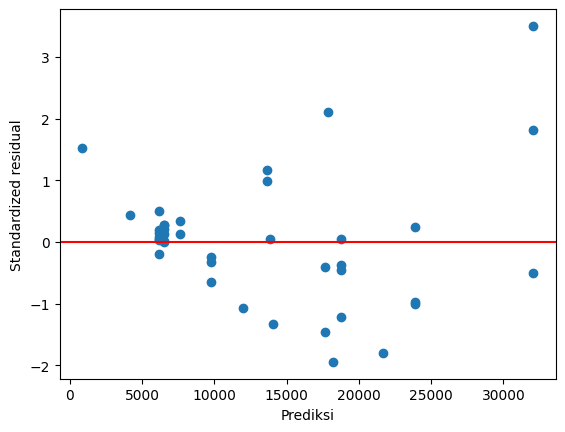

In [101]:
influence = model.get_influence()
std_residual = influence.resid_studentized_internal
# Calculate or define 'prediksi' with the same length as 'std_residual'
prediksi = model.predict()  # Assuming 'model' is your fitted regression model
#Alternatively, you could use:
#prediksi = model.fittedvalues # This would grab the fitted values from the model

plt.scatter(prediksi, std_residual);
plt.axhline(0, color='r')
plt.xlabel('Prediksi');
plt.ylabel('Standardized residual');
plt.xlim()

##Memeriksa asumsi residual berdistribusi normal

In [102]:
# Pengujian jarque
from statsmodels.compat import lzip
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
name = ['Jarque-Bera', 'Chi^2 two-tail prob.', 'Skew', 'Kurtosis']
test = sms.jarque_bera(residual)
lzip(name, test)

[('Jarque-Bera', 8.392193985676881),
 ('Chi^2 two-tail prob.', 0.015054219030238427),
 ('Skew', 0.7894013958103061),
 ('Kurtosis', 4.594584001104078)]

#Pengujian durbin-Watson

In [103]:
from statsmodels.stats.stattools import durbin_watson
dw = durbin_watson(model.resid)
print(f"Durbin-Watson Statistic: {dw}")

Durbin-Watson Statistic: 1.1912358784180832


##Memeriksa asumsi residual tidak terjadi heteroskedastisitas

In [106]:
# Pengujian Breush Pagan
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
names = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
test = sms.het_breuschpagan(model.resid, model.model.exog)
lzip(names, test)

[('Lagrange multiplier statistic', 11.518745971314615),
 ('p-value', 0.003153088010166585),
 ('f-value', 7.482002030342352),
 ('f p-value', 0.0018673840565722008)]

# Uji VIF

In [107]:
from statsmodels.stats .outliers_influence import variance_inflation_factor
# himpunan variabel independen
X = df[['X1', 'X2']]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

  feature      VIF
0      X1  2.67189
1      X2  2.67189


# Menginterpretasikan Model

Y topi = Beta0 + Beta1X1 + Beta2X2

Y topi = −10270+182.32×X1+4233.85×X2

- Untuk estimator B0 tidak di interpretasikan karina tidak terdapat nilai variabel yang sama dengan 0
- Untuk estimator B1 (ukuran mesin) adalah setiap pertambahan satuan ukuran mesin yang ada akan menambah harga jual mobil
- untuk estimator B2 (design mobil) adalah setiap pertambahan satuan design mobil yang dimiliki akan menambah harga jual mobil